<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CAdaptive_thresholding_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Belianinov
#Sandia National Laboratory
#Ion Beam Laboratory 

### Adaptive Thresholding Example

In [ ]:
import cv2 #image processing lib
import numpy as np #fast math
from matplotlib import pyplot as plt #plotting

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10] #figure size

--2021-07-22 14:40:29--  https://drive.google.com/u/0/uc?id=1yKeNxBvT_ejaJUiEAGV2gISpkKZYmhR9
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.101, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3aec1oe9bttad92nmn5hhhr6td3jhabg/1626964800000/06954711203411773855/*/1yKeNxBvT_ejaJUiEAGV2gISpkKZYmhR9 [following]
--2021-07-22 14:40:30--  https://doc-0g-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3aec1oe9bttad92nmn5hhhr6td3jhabg/1626964800000/06954711203411773855/*/1yKeNxBvT_ejaJUiEAGV2gISpkKZYmhR9
Resolving doc-0g-2k-docs.googleusercontent.com (doc-0g-2k-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0g-2k-docs.googleusercontent.com (doc-0g-2k-docs.googleusercontent.com

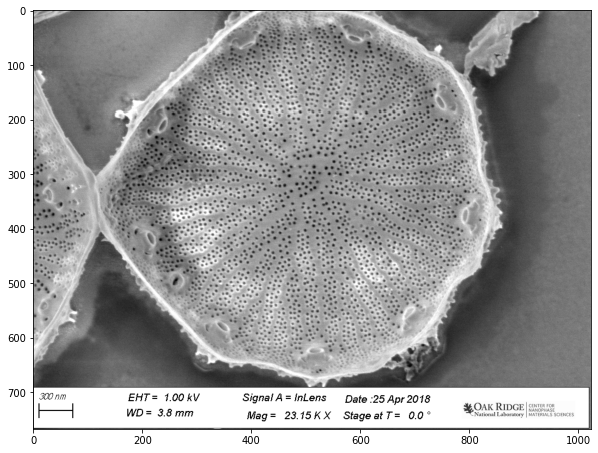

In [ ]:
!wget -O Wild006.tif https://drive.google.com/u/0/uc?id=1yKeNxBvT_ejaJUiEAGV2gISpkKZYmhR9&export=download
img = cv2.imread('Wild006.tif') #load in image
plt.imshow(img) #show image data

(691, 1024, 3)


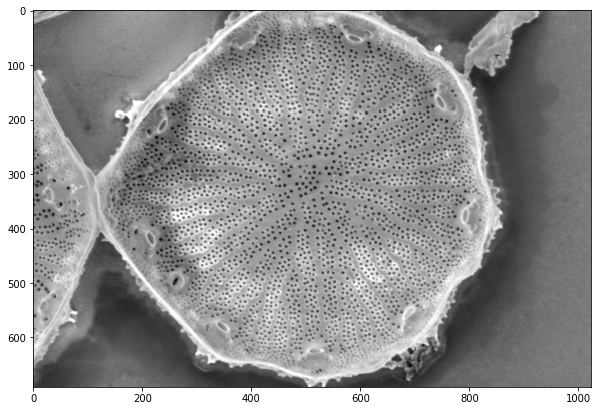

In [ ]:
img_crop = img[:-77, :] #crop the bar at the bottom
plt.imshow(img_crop) #show the cropped image
print(np.shape(img_crop)) #print the shape of the image matrix

In [ ]:
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY) #flatten image matrix to 2D
print(np.shape(img_gray)) #check shape

(691, 1024)


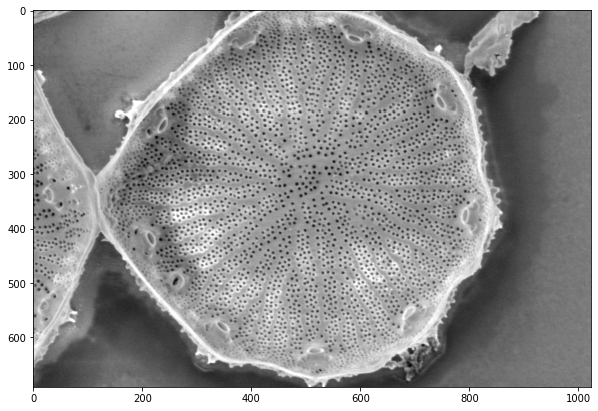

In [ ]:
img_blur = cv2.medianBlur(img_gray, 1) #light image blur
plt.imshow(img_blur, 'gray') 

In the previous section, we used a global value as threshold value. But this may not be a good approach for all conditions - images may have different lighting conditions in different areas. Here, we go for adaptive thresholding. With this approach, the algorithm calculates the threshold for a small regions of the image, this is then iterated over the entire canvas. Therefore, we get different thresholds for different regions of the same image, giving us better results for images with varying illumination.


The function has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.

adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
- cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
- Block Size - It decides the size of neighbourhood area.

- C - It is just a constant which is subtracted from the mean or weighted mean calculated.


In [ ]:
ret,th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, # mean of neighbourhood area
            cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # weighted sum of neighbourhood with
                                                                          # weights as a gaussian window
            cv2.THRESH_BINARY,11,2)

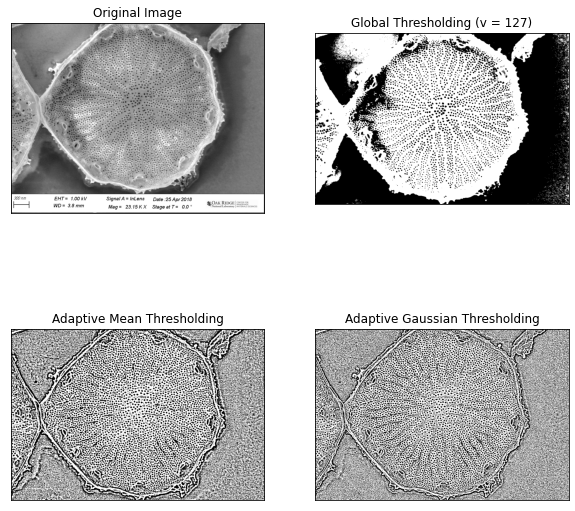

In [ ]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'] #image titles

images = [img, th1, th2, th3] #image data

#plot the images
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
img = img_as_ubyte(img_blur)

radius = 13
selem = disk(radius)

local_otsu = rank.otsu(img, selem) #otsu thresholding
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu


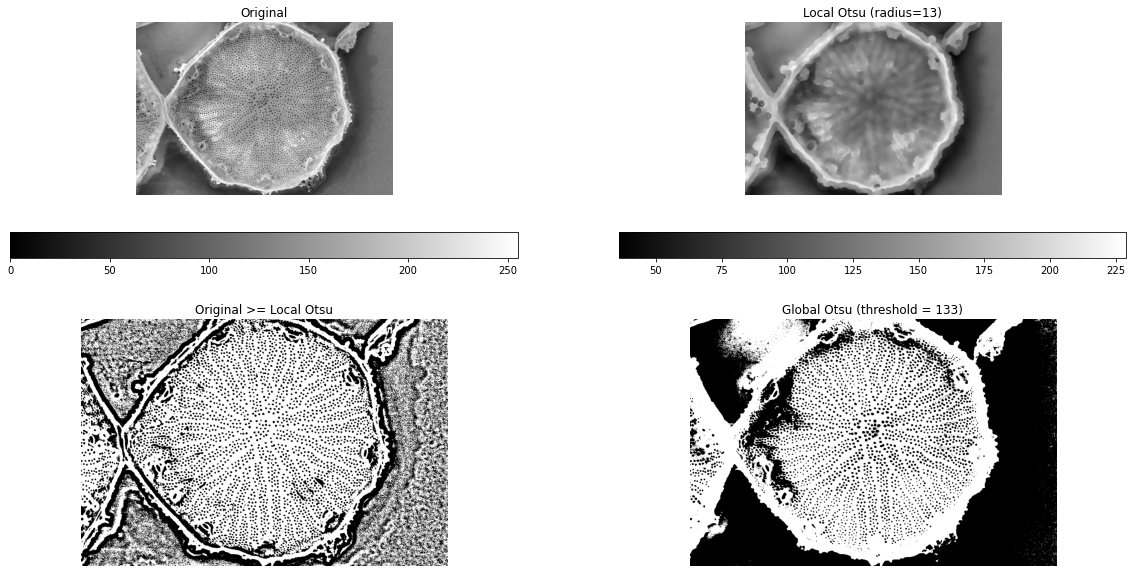

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

#plot all the images

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()